In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df_day_2 = pd.read_csv('./data/prices_round_5_day_2.csv', sep=';')
df_day_3 = pd.read_csv('./data/prices_round_5_day_3.csv', sep=';')
df_day_4 = pd.read_csv('./data/prices_round_5_day_4.csv', sep=';')
df = pd.concat([df_day_2, df_day_3, df_day_4])
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,PICNIC_BASKET2,30094.0,11.0,30093.0,27.0,NaN,NaN,30099.0,1.0,30100.0,37.0,NaN,NaN,30096.5,0.0
1,2,0,VOLCANIC_ROCK_VOUCHER_9750,469.0,11.0,NaN,NaN,NaN,NaN,470.0,11.0,NaN,NaN,NaN,NaN,469.5,0.0
2,2,0,RAINFOREST_RESIN,9992.0,35.0,NaN,NaN,NaN,NaN,10008.0,35.0,NaN,NaN,NaN,NaN,10000.0,0.0
3,2,0,VOLCANIC_ROCK_VOUCHER_9500,718.0,11.0,NaN,NaN,NaN,NaN,719.0,11.0,NaN,NaN,NaN,NaN,718.5,0.0
4,2,0,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219.0,150.0,10220.0,64.0,NaN,NaN,10218.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,999900,VOLCANIC_ROCK_VOUCHER_10500,0.0,11.0,NaN,NaN,NaN,NaN,2.0,11.0,NaN,NaN,NaN,NaN,1.0,0.0
149996,4,999900,DJEMBES,13409.0,30.0,13408.0,50.0,NaN,NaN,13410.0,80.0,NaN,NaN,NaN,NaN,13409.5,0.0
149997,4,999900,VOLCANIC_ROCK,10104.0,146.0,NaN,NaN,NaN,NaN,10106.0,104.0,10107.0,42.0,NaN,NaN,10105.0,0.0
149998,4,999900,RAINFOREST_RESIN,9992.0,35.0,NaN,NaN,NaN,NaN,9999.0,1.0,10008.0,35.0,NaN,NaN,9995.5,0.0


In [3]:
unique_products = df['product'].unique()
print(unique_products)

['PICNIC_BASKET2' 'VOLCANIC_ROCK_VOUCHER_9750' 'RAINFOREST_RESIN'
 'VOLCANIC_ROCK_VOUCHER_9500' 'VOLCANIC_ROCK' 'SQUID_INK'
 'VOLCANIC_ROCK_VOUCHER_10250' 'KELP' 'DJEMBES' 'CROISSANTS'
 'MAGNIFICENT_MACARONS' 'JAMS' 'VOLCANIC_ROCK_VOUCHER_10000'
 'VOLCANIC_ROCK_VOUCHER_10500' 'PICNIC_BASKET1']


In [4]:
# Create a datetime-like index
df['combined_ts'] = df['day'].astype(str) + '_' + df['timestamp'].astype(str)
df_by_product = {}
for product in unique_products:
    df_by_product[product] = df[df['product'] == product]
    df_by_product[product].set_index('combined_ts', inplace=True)

In [5]:
df_by_product['VOLCANIC_ROCK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
2_0,2,0,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219.0,150.0,10220.0,64.0,NaN,NaN,10218.5,0.0
2_100,2,100,VOLCANIC_ROCK,10217.0,106.0,10216.0,44.0,NaN,NaN,10218.0,106.0,10219.0,44.0,NaN,NaN,10217.5,0.0
2_200,2,200,VOLCANIC_ROCK,10221.0,136.0,10220.0,55.0,NaN,NaN,10223.0,191.0,NaN,NaN,NaN,NaN,10222.0,0.0
2_300,2,300,VOLCANIC_ROCK,10222.0,168.0,NaN,NaN,NaN,NaN,10224.0,107.0,10225.0,61.0,NaN,NaN,10223.0,0.0
2_400,2,400,VOLCANIC_ROCK,10216.0,181.0,NaN,NaN,NaN,NaN,10218.0,127.0,10219.0,54.0,NaN,NaN,10217.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_999500,4,999500,VOLCANIC_ROCK,10104.0,193.0,NaN,NaN,NaN,NaN,10106.0,142.0,10107.0,51.0,NaN,NaN,10105.0,0.0
4_999600,4,999600,VOLCANIC_ROCK,10105.0,131.0,10104.0,74.0,NaN,NaN,10107.0,207.0,NaN,NaN,NaN,NaN,10106.0,0.0
4_999700,4,999700,VOLCANIC_ROCK,10106.0,123.0,10105.0,56.0,NaN,NaN,10107.0,123.0,10108.0,56.0,NaN,NaN,10106.5,0.0


<Axes: xlabel='combined_ts'>

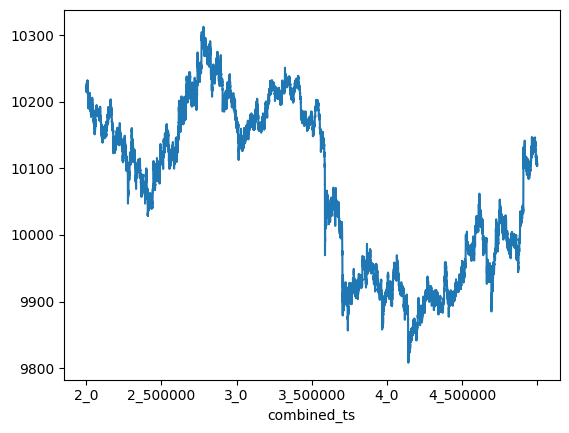

In [6]:
df_by_product['VOLCANIC_ROCK']['mid_price'].plot()

<Axes: xlabel='combined_ts'>

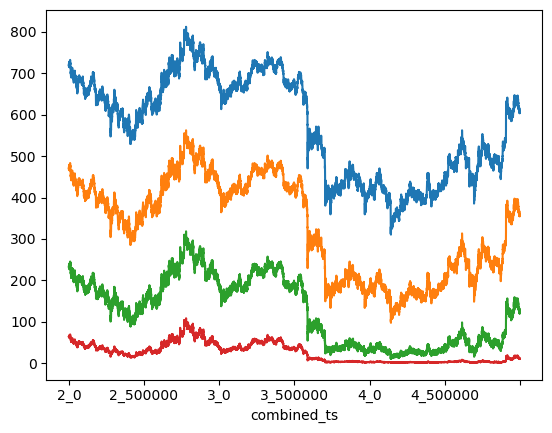

In [7]:
# premium
df_by_product['VOLCANIC_ROCK_VOUCHER_9500']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_9750']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10000']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10250']['mid_price'].plot()

In [8]:
df_by_product['VOLCANIC_ROCK'].head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
2_0,2,0,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219.0,150.0,10220.0,64.0,NaN,NaN,10218.5,0.0
2_100,2,100,VOLCANIC_ROCK,10217.0,106.0,10216.0,44.0,NaN,NaN,10218.0,106.0,10219.0,44.0,NaN,NaN,10217.5,0.0
2_200,2,200,VOLCANIC_ROCK,10221.0,136.0,10220.0,55.0,NaN,NaN,10223.0,191.0,NaN,NaN,NaN,NaN,10222.0,0.0
2_300,2,300,VOLCANIC_ROCK,10222.0,168.0,NaN,NaN,NaN,NaN,10224.0,107.0,10225.0,61.0,NaN,NaN,10223.0,0.0
2_400,2,400,VOLCANIC_ROCK,10216.0,181.0,NaN,NaN,NaN,NaN,10218.0,127.0,10219.0,54.0,NaN,NaN,10217.0,0.0


<Axes: xlabel='combined_ts'>

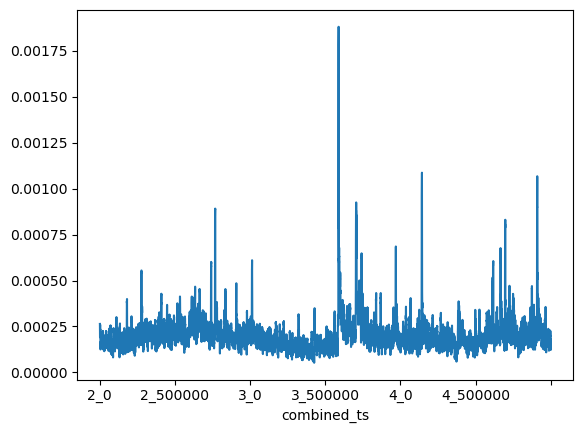

In [9]:
rolling_vol = df_by_product['VOLCANIC_ROCK']['mid_price'].pct_change().rolling(20).std()
rolling_vol.plot()

In [10]:
df_by_product['SQUID_INK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
2_0,2,0,SQUID_INK,1799.0,23.0,NaN,NaN,NaN,NaN,1802.0,22.0,NaN,NaN,NaN,NaN,1800.5,0.0
2_100,2,100,SQUID_INK,1800.0,26.0,NaN,NaN,NaN,NaN,1802.0,5.0,1803.0,26.0,NaN,NaN,1801.0,0.0
2_200,2,200,SQUID_INK,1803.0,1.0,1801.0,32.0,NaN,NaN,1804.0,32.0,NaN,NaN,NaN,NaN,1803.5,0.0
2_300,2,300,SQUID_INK,1801.0,27.0,NaN,NaN,NaN,NaN,1804.0,28.0,NaN,NaN,NaN,NaN,1802.5,0.0
2_400,2,400,SQUID_INK,1800.0,30.0,NaN,NaN,NaN,NaN,1803.0,25.0,NaN,NaN,NaN,NaN,1801.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_999500,4,999500,SQUID_INK,1905.0,22.0,NaN,NaN,NaN,NaN,1908.0,22.0,NaN,NaN,NaN,NaN,1906.5,0.0
4_999600,4,999600,SQUID_INK,1901.0,30.0,NaN,NaN,NaN,NaN,1903.0,3.0,1904.0,30.0,NaN,NaN,1902.0,0.0
4_999700,4,999700,SQUID_INK,1899.0,28.0,NaN,NaN,NaN,NaN,1902.0,29.0,NaN,NaN,NaN,NaN,1900.5,0.0


<Axes: xlabel='combined_ts'>

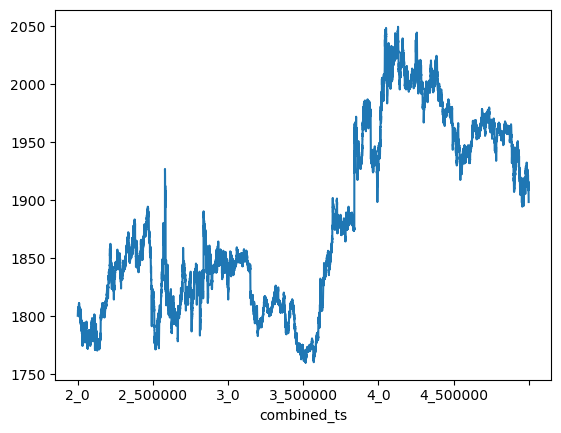

In [11]:
mid_price = df_by_product['SQUID_INK']['mid_price']
z_score = (mid_price - mid_price.rolling(50).mean()) / mid_price.rolling(50).std()

mid_price.plot()

In [12]:
# Define product names
VR = 'VOLCANIC_ROCK'
options = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Start by creating a combined DataFrame with underlying
df_combined = pd.DataFrame({
    'underlying': df_by_product[VR]['mid_price']
})

# Add each option price to the same DataFrame
for opt in options:
    df_combined[opt] = df_by_product[opt]['mid_price']

df_combined

,underlying,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,,
2_0,10218.5,718.5,469.5,233.5,63.5,8.5
2_100,10217.5,718.0,469.0,234.5,62.5,8.5
2_200,10222.0,722.5,473.5,235.5,64.5,9.5
2_300,10223.0,723.5,474.5,235.5,65.5,9.5
2_400,10217.0,717.5,468.5,234.5,62.5,8.5
...,...,...,...,...,...,...
4_999500,10105.0,605.5,356.5,120.5,10.5,1.0
4_999600,10106.0,606.5,356.5,122.5,10.5,1.0
4_999700,10106.5,606.5,357.5,123.5,10.5,1.0


In [13]:
# Prepare a dictionary to hold average deltas
avg_deltas = {}

# Loop through each option and calculate delta
for opt in options:
    df_temp = df_combined[['underlying', opt]].copy()
    df_temp['dS'] = df_temp['underlying'].diff()
    df_temp['dO'] = df_temp[opt].diff()
    
    # Filter out where dS is 0 or NaN
    df_temp = df_temp[~((df_temp['dS'] == 0) | (df_temp['dS'].isna()))].copy()
    
    # Calculate delta
    df_temp['delta'] = df_temp['dO'] / df_temp['dS']
    
    # Store the average delta
    avg_deltas[opt] = df_temp['delta'].mean()

# Print average deltas
for opt, delta in avg_deltas.items():
    print(f"{opt} average delta: {delta:.4f}")

VOLCANIC_ROCK_VOUCHER_9500 average delta: 0.9715
VOLCANIC_ROCK_VOUCHER_9750 average delta: 0.9243
VOLCANIC_ROCK_VOUCHER_10000 average delta: 0.6258
VOLCANIC_ROCK_VOUCHER_10250 average delta: 0.1946
VOLCANIC_ROCK_VOUCHER_10500 average delta: 0.0247


<Axes: xlabel='combined_ts'>

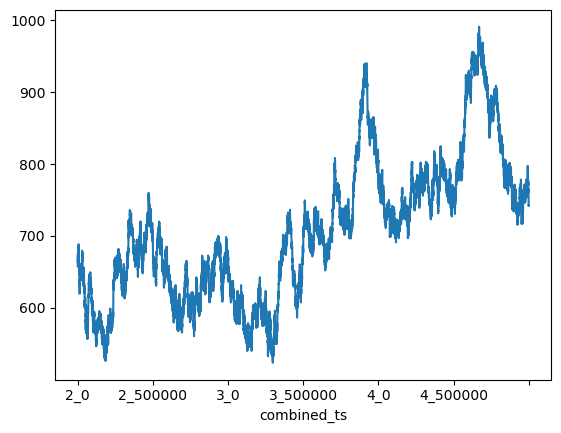

In [14]:
# round 4
mid_price = df_by_product['MAGNIFICENT_MACARONS']['mid_price']
mid_price.plot()

In [15]:
df_by_product['MAGNIFICENT_MACARONS']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
2_0,2,0,MAGNIFICENT_MACARONS,653.0,20.0,651.0,10.0,645.0,21.0,662.0,10.0,671.0,21.0,677.0,10.0,657.5,0.0
2_100,2,100,MAGNIFICENT_MACARONS,657.0,12.0,654.0,19.0,648.0,26.0,666.0,6.0,674.0,26.0,681.0,19.0,661.5,0.0
2_200,2,200,MAGNIFICENT_MACARONS,660.0,12.0,658.0,13.0,652.0,30.0,669.0,6.0,678.0,30.0,684.0,13.0,664.5,0.0
2_300,2,300,MAGNIFICENT_MACARONS,665.0,20.0,663.0,15.0,657.0,27.0,674.0,10.0,683.0,27.0,689.0,15.0,669.5,0.0
2_400,2,400,MAGNIFICENT_MACARONS,670.0,20.0,667.0,16.0,661.0,25.0,679.0,10.0,687.0,25.0,694.0,16.0,674.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_999500,4,999500,MAGNIFICENT_MACARONS,742.0,10.0,740.0,14.0,735.0,21.0,749.0,5.0,756.0,21.0,761.0,14.0,745.5,0.0
4_999600,4,999600,MAGNIFICENT_MACARONS,738.0,12.0,736.0,12.0,731.0,28.0,745.0,6.0,752.0,28.0,757.0,12.0,741.5,0.0
4_999700,4,999700,MAGNIFICENT_MACARONS,742.0,18.0,740.0,16.0,735.0,29.0,749.0,9.0,756.0,29.0,761.0,16.0,745.5,0.0


In [16]:
factor_day_2 = pd.read_csv('./round-5-island-data-bottle/observations_round_5_day_2.csv')
factor_day_3 = pd.read_csv('./round-5-island-data-bottle/observations_round_5_day_3.csv')
factor_day_4 = pd.read_csv('./round-5-island-data-bottle/observations_round_5_day_4.csv')

factor_day_2['day'] = 2
factor_day_3['day'] = 3
factor_day_4['day'] = 4

factor_df = pd.concat([factor_day_2, factor_day_3, factor_day_4], ignore_index=True)

In [17]:
factor_df['combined_ts'] = factor_df['day'].astype(str) + '_' + factor_df['timestamp'].astype(str)
factor_df.set_index('combined_ts', inplace=True)
factor_df

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
combined_ts,,,,,,,,,
2_0,0,657.0,658.5,1.4,10.5,-4.0,209.000000,65.00,2
2_100,100,660.5,662.0,1.4,10.5,-4.0,209.299299,65.00,2
2_200,200,664.0,665.5,1.4,10.5,-4.0,209.467113,65.00,2
2_300,300,669.0,670.5,1.4,10.5,-4.0,209.525592,65.00,2
2_400,400,673.5,675.0,1.4,10.5,-4.0,209.597333,65.00,2
...,...,...,...,...,...,...,...,...,...
4_999500,999500,745.0,746.5,1.6,7.5,-4.0,206.028012,59.94,4
4_999600,999600,741.0,742.5,1.6,7.5,-4.0,205.991170,59.95,4
4_999700,999700,744.5,746.0,1.6,7.5,-4.0,206.053141,59.96,4


<Axes: xlabel='combined_ts'>

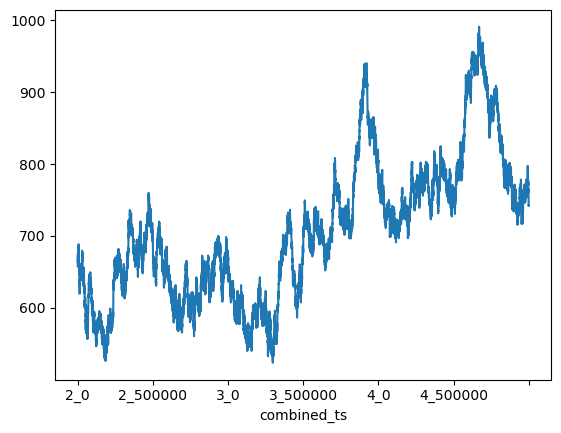

In [18]:
factor_df['mid_price'] = df_by_product['MAGNIFICENT_MACARONS']['mid_price']
factor_df['mid_price'].plot()

In [19]:
factor_df

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day,mid_price
combined_ts,,,,,,,,,,
2_0,0,657.0,658.5,1.4,10.5,-4.0,209.000000,65.00,2,657.5
2_100,100,660.5,662.0,1.4,10.5,-4.0,209.299299,65.00,2,661.5
2_200,200,664.0,665.5,1.4,10.5,-4.0,209.467113,65.00,2,664.5
2_300,300,669.0,670.5,1.4,10.5,-4.0,209.525592,65.00,2,669.5
2_400,400,673.5,675.0,1.4,10.5,-4.0,209.597333,65.00,2,674.5
...,...,...,...,...,...,...,...,...,...,...
4_999500,999500,745.0,746.5,1.6,7.5,-4.0,206.028012,59.94,4,745.5
4_999600,999600,741.0,742.5,1.6,7.5,-4.0,205.991170,59.95,4,741.5
4_999700,999700,744.5,746.0,1.6,7.5,-4.0,206.053141,59.96,4,745.5


In [20]:
px_sunlight_df = factor_df[['mid_price', 'sugarPrice', 'sunlightIndex']]
px_sunlight_corr = px_sunlight_df.corr()
px_sunlight_corr

,mid_price,sugarPrice,sunlightIndex
mid_price,1.000000,0.767443,-0.680977
sugarPrice,0.767443,1.000000,-0.476970
sunlightIndex,-0.680977,-0.476970,1.000000


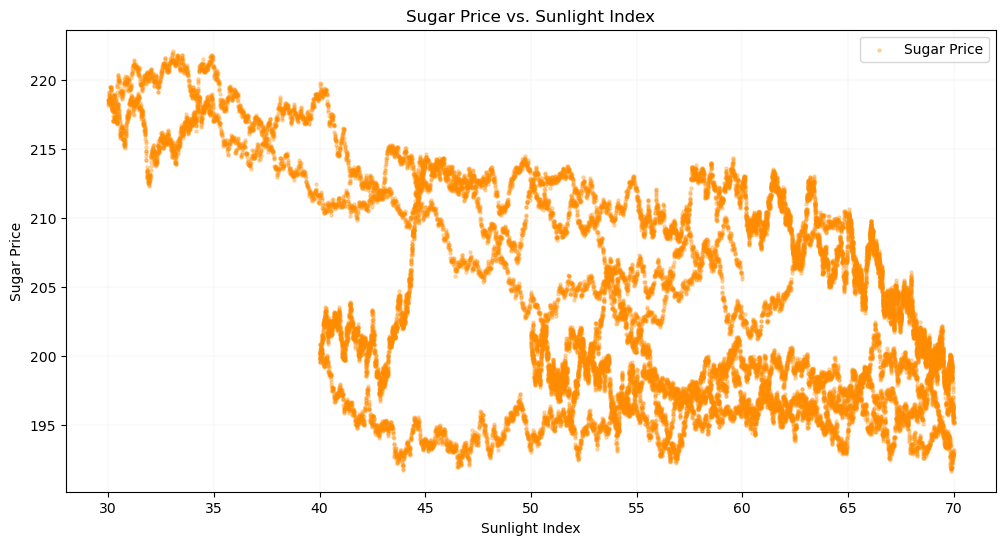

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(
    px_sunlight_df['sunlightIndex'], 
    px_sunlight_df['sugarPrice'], 
    alpha=0.3, s=5, c='darkorange', label='Sugar Price'
)
plt.title('Sugar Price vs. Sunlight Index')
plt.xlabel('Sunlight Index')
plt.ylabel('Sugar Price')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.1)
plt.show()

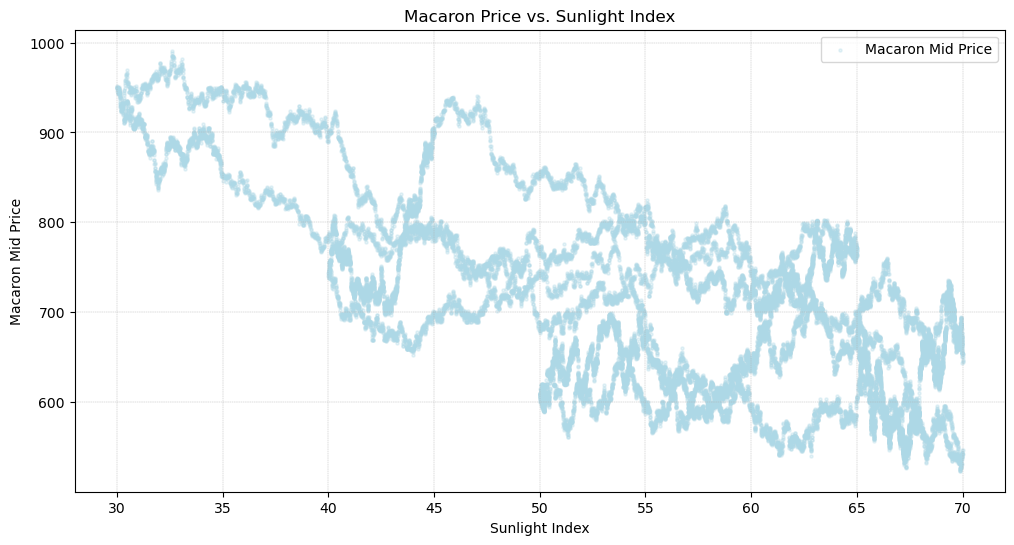

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(
    px_sunlight_df['sunlightIndex'], 
    px_sunlight_df['mid_price'], 
    alpha=0.3, s=5, c='lightblue', label='Macaron Mid Price'
)
plt.title('Macaron Price vs. Sunlight Index')
plt.xlabel('Sunlight Index')
plt.ylabel('Macaron Mid Price')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.3)
plt.show()

In [23]:
# # find csi
# csi = 60

# below_csi = px_sunlight_df[px_sunlight_df['sunlightIndex'] < csi]
# above_csi = px_sunlight_df[px_sunlight_df['sunlightIndex'] >= csi]

# corr_below = below_csi[['sunlightIndex', 'sugarPrice', 'mid_price']].corr()
# print("Correlation (Below CSI):")
# print(corr_below)

# # Define x and y
# X = below_csi['sunlightIndex']
# y = below_csi['sugarPrice']

# # Add constant for intercept
# X = sm.add_constant(X)

# # Fit linear regression
# model = sm.OLS(y, X).fit()

# # Get the slope's t-value (coefficient for sunlightIndex)
# t_value = model.tvalues['sunlightIndex']
# slope = model.params['sunlightIndex']

# print(f"Slope: {slope:.4f}")
# print(f"T-value: {t_value:.4f}")

# # Define x and y
# X = below_csi['sunlightIndex']
# y = below_csi['mid_price']

# # Add constant for intercept
# X = sm.add_constant(X)

# # Fit linear regression
# model = sm.OLS(y, X).fit()

# # Get the slope's t-value (coefficient for sunlightIndex)
# t_value = model.tvalues['sunlightIndex']
# slope = model.params['sunlightIndex']

# print(f"Slope: {slope:.4f}")
# print(f"T-value: {t_value:.4f}")

In [24]:
results = []

for csi in range(20, 71):  # you can adjust the range
    below = px_sunlight_df[px_sunlight_df['sunlightIndex'] < csi]
    
    if len(below) < 50:  # skip too-small samples
        continue

    # sugar price
    X_sugar = sm.add_constant(below['sunlightIndex'])
    y_sugar = below['sugarPrice']
    model_sugar = sm.OLS(y_sugar, X_sugar).fit()
    slope_sugar = model_sugar.params['sunlightIndex']
    tval_sugar = model_sugar.tvalues['sunlightIndex']
    corr_sugar = below[['sunlightIndex', 'sugarPrice']].corr().iloc[0, 1]

    # macaron mid_price
    X_macaron = sm.add_constant(below['sunlightIndex'])
    y_macaron = below['mid_price']
    model_macaron = sm.OLS(y_macaron, X_macaron).fit()
    slope_macaron = model_macaron.params['sunlightIndex']
    tval_macaron = model_macaron.tvalues['sunlightIndex']
    corr_macaron = below[['sunlightIndex', 'mid_price']].corr().iloc[0, 1]

    results.append({
        'CSI': csi,
        'Slope_Sugar': slope_sugar,
        'T_Sugar': tval_sugar,
        'Corr_Sugar': corr_sugar,
        'Slope_Macaron': slope_macaron,
        'T_Macaron': tval_macaron,
        'Corr_Macaron': corr_macaron,
        'Number_of_Samples': len(below)
    })

# Turn results into DataFrame
results_df = pd.DataFrame(results)

# Show top values with strong negative t-values
results_df.sort_values(by='CSI', inplace=True)

results_df.set_index('CSI', inplace=True)

results_df

,Slope_Sugar,T_Sugar,Corr_Sugar,Slope_Macaron,T_Macaron,Corr_Macaron,Number_of_Samples
CSI,,,,,,,
31,-0.910636,-3.587432,-0.199650,-20.891316,-7.196237,-0.378338,312
32,-0.459027,-3.504042,-0.138914,-23.774493,-12.253631,-0.440405,626
33,-0.493697,-6.006320,-0.192250,-10.369102,-7.694801,-0.243427,942
34,-0.200301,-3.586460,-0.100763,-7.436058,-8.752326,-0.239938,1256
35,0.118739,3.094598,0.077913,-5.666599,-9.521020,-0.233779,1570
36,0.061729,2.001731,0.047620,-4.903943,-9.518375,-0.221083,1765
37,-0.103570,-4.115106,-0.092622,-4.521799,-9.912485,-0.218650,1959
38,-0.208725,-10.239760,-0.215593,-5.777676,-15.174364,-0.310962,2153
39,-0.239876,-14.000646,-0.277689,-6.012945,-18.183625,-0.351467,2348


/var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/ipykernel_45930/2859009502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_grid['CSI'] = results_df.index


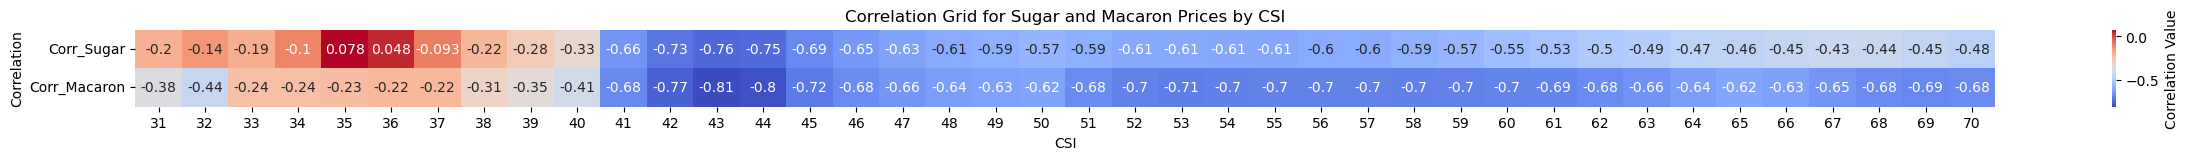

In [25]:
corr_grid = results_df[['Corr_Sugar', 'Corr_Macaron']]

# Set the CSI index as a column to use it for plotting
corr_grid['CSI'] = results_df.index

# Now, we can plot the heatmap
plt.figure(figsize=(30, 1))

# Create the heatmap
sns.heatmap(corr_grid.set_index('CSI').T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Value'})

# Title and labels
plt.title('Correlation Grid for Sugar and Macaron Prices by CSI')
plt.xlabel('CSI')
plt.ylabel('Correlation')

# Show the plot
plt.show()

In [26]:
csi = 43

# build our model
# dependent on all sorts of observable factors like hours of sun light, sugar prices, shipping costs, in- & export tariffs and suitable storage space
above_csi = factor_df[factor_df['sunlightIndex'] >= csi]
above_csi = above_csi.sort_values(by=['day', 'timestamp'], ascending=[True, True])

above_csi_df = above_csi[['mid_price', 'sunlightIndex', 'sugarPrice', 'transportFees', 'importTariff', 'exportTariff']]
above_csi_df

,mid_price,sunlightIndex,sugarPrice,transportFees,importTariff,exportTariff
combined_ts,,,,,,
2_0,657.5,65.00,209.000000,1.4,-4.0,10.5
2_100,661.5,65.00,209.299299,1.4,-4.0,10.5
2_200,664.5,65.00,209.467113,1.4,-4.0,10.5
2_300,669.5,65.00,209.525592,1.4,-4.0,10.5
2_400,674.5,65.00,209.597333,1.4,-4.0,10.5
...,...,...,...,...,...,...
4_999500,745.5,59.94,206.028012,1.6,-4.0,7.5
4_999600,741.5,59.95,205.991170,1.6,-4.0,7.5
4_999700,745.5,59.96,206.053141,1.6,-4.0,7.5


In [27]:
# Define the return as the percentage change in 'mid_price' (this will be the target variable)
above_csi_df['return'] = above_csi_df['mid_price'].pct_change().shift(-1)  # Percentage change from current to next row
above_csi_df = above_csi_df.dropna()  # Drop NaN values
above_csi_df[['return', 'sunlightIndex', 'sugarPrice', 'transportFees', 'importTariff', 'exportTariff']]

/var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/ipykernel_45930/472946682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_csi_df['return'] = above_csi_df['mid_price'].pct_change().shift(-1)  # Percentage change from current to next row


,return,sunlightIndex,sugarPrice,transportFees,importTariff,exportTariff
combined_ts,,,,,,
2_0,0.006084,65.00,209.000000,1.4,-4.0,10.5
2_100,0.004535,65.00,209.299299,1.4,-4.0,10.5
2_200,0.007524,65.00,209.467113,1.4,-4.0,10.5
2_300,0.007468,65.00,209.525592,1.4,-4.0,10.5
2_400,-0.001483,65.00,209.597333,1.4,-4.0,10.5
...,...,...,...,...,...,...
4_999400,-0.007984,59.92,206.094165,1.6,-4.0,7.5
4_999500,-0.005366,59.94,206.028012,1.6,-4.0,7.5
4_999600,0.005394,59.95,205.991170,1.6,-4.0,7.5


In [28]:
# Features (independent variables)
X = above_csi_df[['transportFees', 'importTariff', 'exportTariff']]

# Add a constant to the independent variables matrix for the intercept term
X = sm.add_constant(X)

# Target (dependent variable)
y = above_csi_df['mid_price']

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     8952.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:17:10   Log-Likelihood:            -1.3806e+05
No. Observations:               25277   AIC:                         2.761e+05
Df Residuals:                   25273   BIC:                         2.762e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           965.5269      6.692    144.281

In [7]:
# Load data
trade_day_2 = pd.read_csv('./data/trades_round_5_day_2.csv', sep=';')
trade_day_3 = pd.read_csv('./data/trades_round_5_day_3.csv', sep=';')
trade_day_4 = pd.read_csv('./data/trades_round_5_day_4.csv', sep=';')

trade_day_2['day'] = 2
trade_day_3['day'] = 3
trade_day_4['day'] = 4

# Combine all trade data
mkt_trade = pd.concat([trade_day_2, trade_day_3, trade_day_4])

# Sort the dataframe by product and day, then timestamp
mkt_trade = mkt_trade.sort_values(by=['symbol', 'day', 'timestamp']).reset_index(drop=True)

# Set a MultiIndex based on product ('symbol') and day
mkt_trade.set_index(['symbol', 'day'], inplace=True)

In [8]:
# Example: Access market trade for SQUID_INK on day 2
print(mkt_trade.loc[('SQUID_INK', 2)])

               timestamp    buyer   seller   currency   price  quantity
symbol    day                                                          
SQUID_INK 2          200    Paris  Charlie  SEASHELLS  1803.0         1
          2          300  Charlie    Paris  SEASHELLS  1801.0         1
          2          500    Paris  Charlie  SEASHELLS  1804.0         2
          2          900  Charlie     Gary  SEASHELLS  1803.0         8
          2         1200  Camilla    Paris  SEASHELLS  1804.0         1
...                  ...      ...      ...        ...     ...       ...
          2       998000  Camilla    Paris  SEASHELLS  1825.0         1
          2       998200  Charlie    Paris  SEASHELLS  1823.0         1
          2       998400  Charlie    Paris  SEASHELLS  1825.0         2
          2       998600  Charlie    Paris  SEASHELLS  1826.0         1
          2       999400    Paris  Charlie  SEASHELLS  1826.0         2

[2929 rows x 6 columns]


In [12]:
mkt_trade

timestamp     buyer   seller   currency  \
symbol                     day                                            
CROISSANTS                 2            0    Caesar    Paris  SEASHELLS   
                           2          200     Paris   Caesar  SEASHELLS   
                           2          600     Paris   Caesar  SEASHELLS   
                           2         1600    Caesar    Paris  SEASHELLS   
                           2         5000    Caesar  Camilla  SEASHELLS   
...                                   ...       ...      ...        ...   
VOLCANIC_ROCK_VOUCHER_9750 4       998300    Caesar   Caesar  SEASHELLS   
                           4       999300  Penelope  Camilla  SEASHELLS   
                           4       999300  Penelope   Caesar  SEASHELLS   
                           4       999500  Penelope  Camilla  SEASHELLS   
                           4       999500  Penelope   Caesar  SEASHELLS   

                                 price  quantity  
symbol                     day                    
CROISSANTS                 2    4265.0         8  
                           2    4266.0         8  
                           2    4266.0         5  
                           2    4267.0         8  
                           2    4267.0         4  
...                                ...       ...  
VOLCANIC_ROCK_VOUCHER_9750 4     355.0         1  
                           4     358.0        10  
                           4     358.0         1  
                           4     357.0        14  
                           4     357.0         1  

[53477 rows x 6 columns]

In [20]:
def plot_pnl(T):
    
    trader_trades = mkt_trade[(mkt_trade['buyer'] == T) | (mkt_trade['seller'] == T)].copy(deep=True)
    trader_trades = trader_trades.reset_index()
    
    def compute_pnl(row):
        ret = 0
        if row['buyer'] == T:
            ret -= row['price'] * row['quantity']
        if row['seller'] == T:
            ret += row['price'] * row['quantity']
        return ret
    
    trader_trades['pnl'] = trader_trades.apply(compute_pnl, axis=1)
    trader_trades = trader_trades.sort_values(by=['symbol', 'day', 'timestamp'])
    trader_trades['cum_pnl'] = trader_trades.groupby('symbol')['pnl'].cumsum()
    trader_trades['day_timestamp'] = trader_trades['day'].astype(str) + ':' + trader_trades['timestamp'].astype(str)
    
    for symbol in trader_trades['symbol'].unique():
        df = trader_trades[trader_trades['symbol'] == symbol]
        
        plt.figure(figsize=(20, 4))
        plt.plot(df['day_timestamp'], df['cum_pnl'], marker='o', label=f"{symbol}")
        plt.title(f"{T}'s Cumulative PnL - {symbol}")
        plt.xlabel("Day:Timestamp")
        plt.ylabel("Cumulative PnL")
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

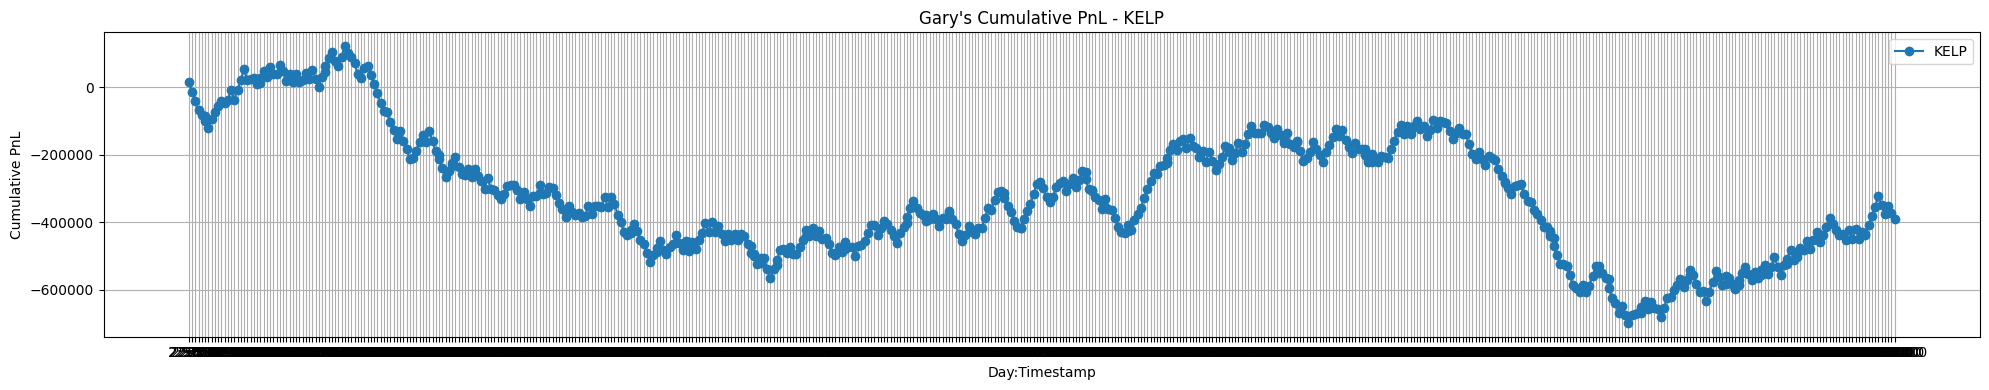

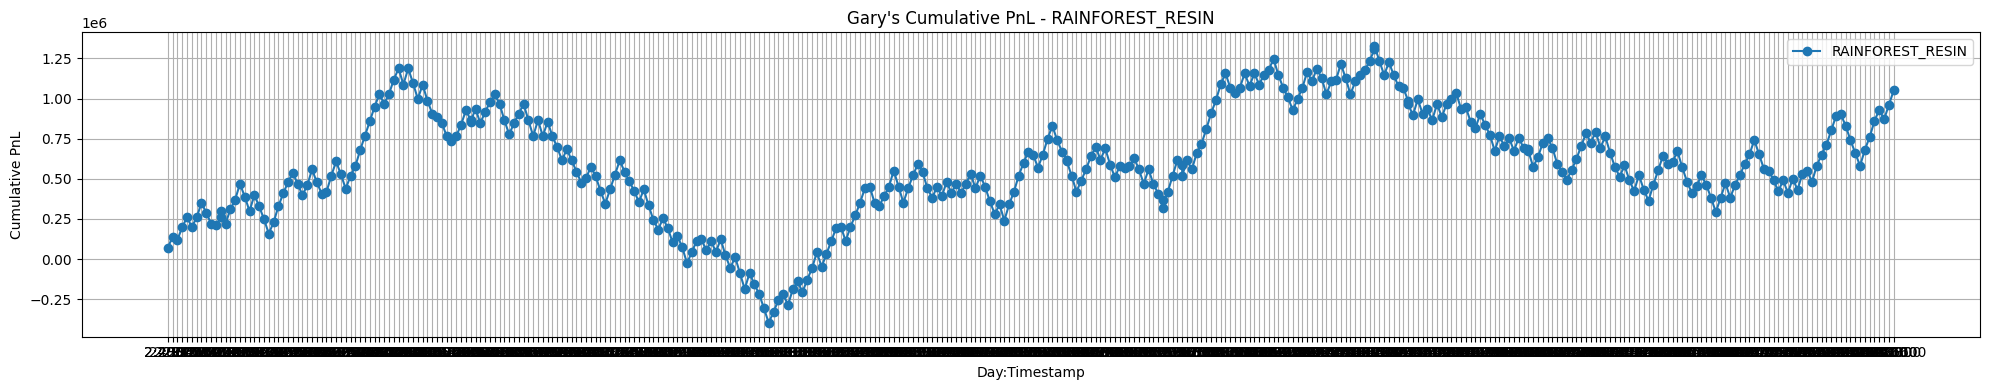

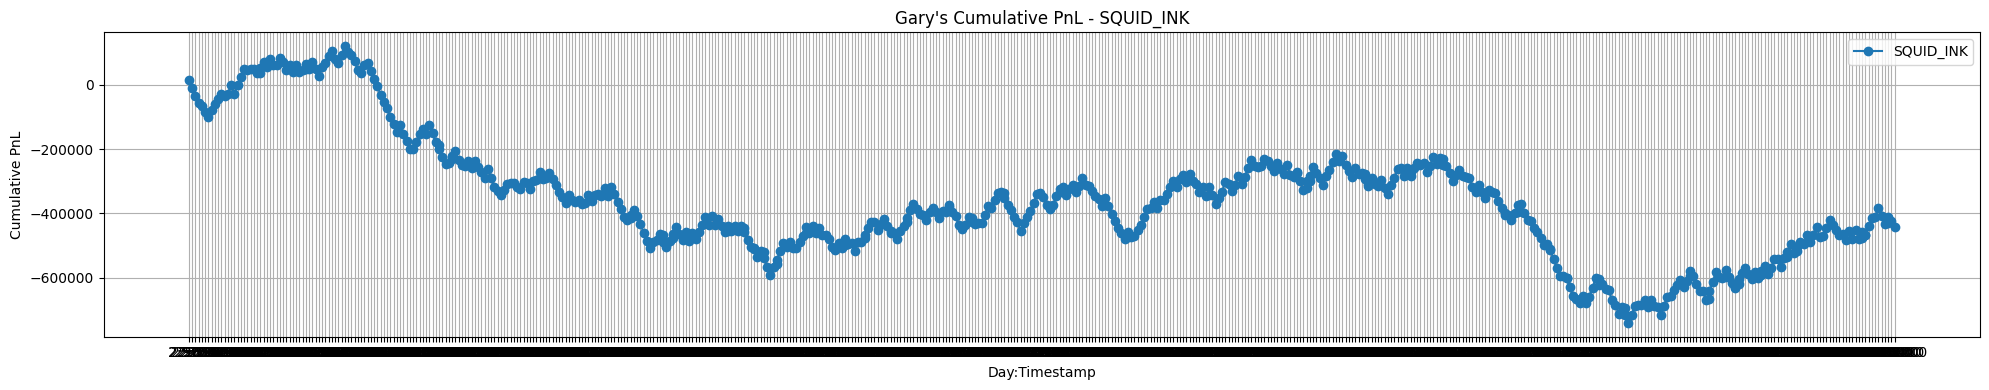

In [23]:
plot_pnl('Gary')